<a href="https://colab.research.google.com/github/mukeshcse07/Machine-Learning-Project/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [10]:
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns
imputer_num = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_num.fit_transform(data[numeric_cols])
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
print(f'Number of missing values: \n{data.isnull().sum()}')

Number of missing values: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [11]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)
best_k = 0
best_score = -1
k_range = range(2, 10)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, clusters)
    silhouette_scores.append(silhouette_avg)

    print(f'For n_clusters = {k}, the silhouette score is {silhouette_avg}')

    if silhouette_avg > best_score:
        best_k = k
        best_score = silhouette_avg

print(f'\nBest number of clusters: {best_k} with a silhouette score of {best_score}')


For n_clusters = 2, the silhouette score is 0.3682318658808231
For n_clusters = 3, the silhouette score is 0.44173219468340547
For n_clusters = 4, the silhouette score is 0.49706811149852015
For n_clusters = 5, the silhouette score is 0.5014905114207608
For n_clusters = 6, the silhouette score is 0.5556428659075036
For n_clusters = 7, the silhouette score is 0.5765843236331857
For n_clusters = 8, the silhouette score is 0.6047897260523748
For n_clusters = 9, the silhouette score is 0.5918609474178627

Best number of clusters: 8 with a silhouette score of 0.6047897260523748


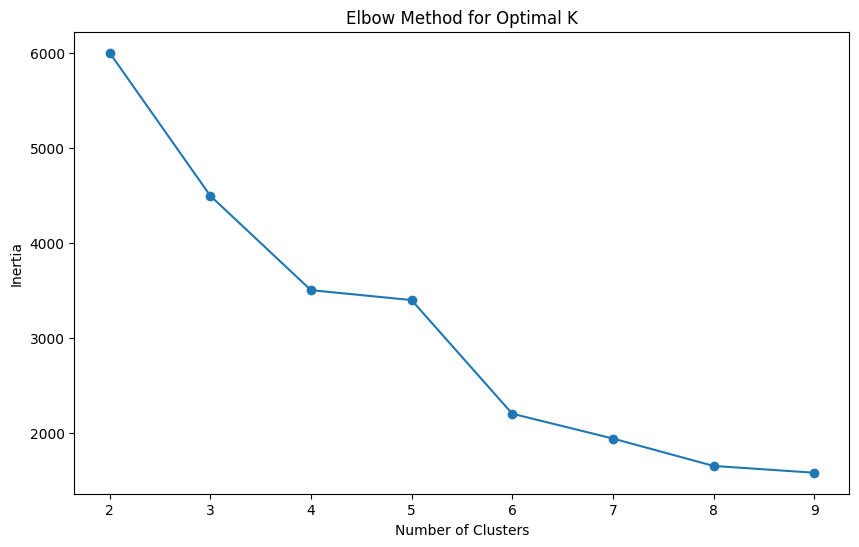

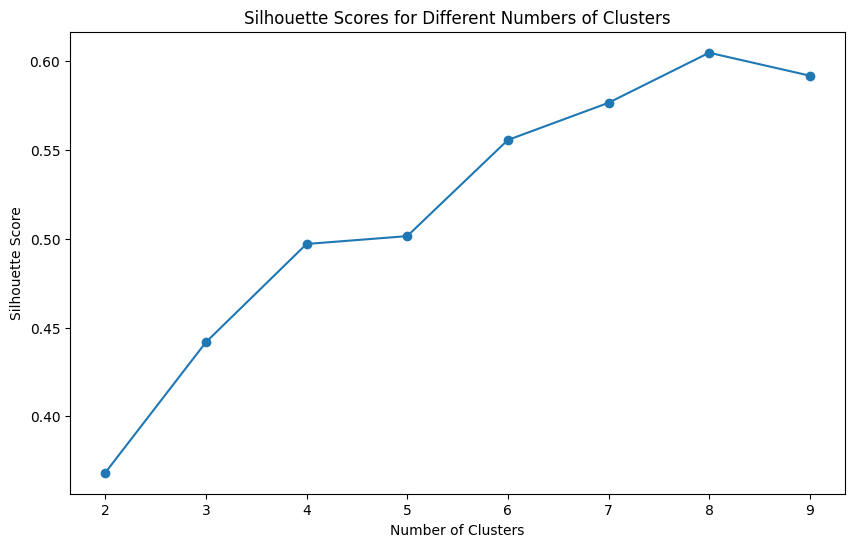

In [13]:
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

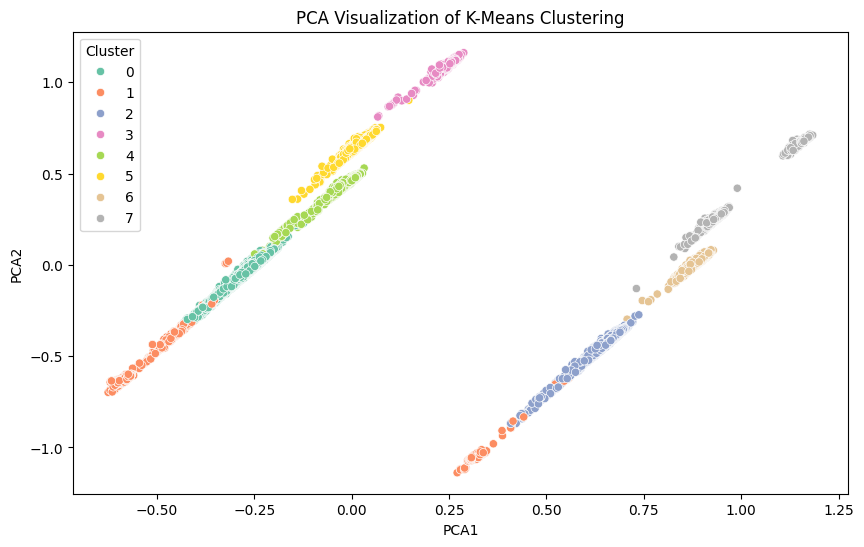

In [12]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)
data['Cluster'] = clusters
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(data_pca)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df)
plt.title('PCA Visualization of K-Means Clustering')
plt.show()
